In [12]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("../Dataset/Student_Performance.csv")

Data Processing

In [3]:
df["Extracurricular Activities"] = df["Extracurricular Activities"].map(
    {"Yes": 1, "No": 0}
)

Converting data into feature matrix and target vector

In [4]:
X = df.drop(columns="Performance Index")
y = df["Performance Index"]

In [5]:
X.sample(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
3730,1,91,0,8,1
4495,4,79,0,4,7
9140,9,96,0,8,3
167,2,62,1,7,9
9178,9,58,0,9,1


Splitting the dataset

In [6]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Creating a multiple Linear Regression model

In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [9]:
model.fit(X_train, y_train)

LinearRegression()

Score and performance of model

In [10]:
model.score(X_train, y_train)

0.9886898790682355

<Axes: xlabel='Actual Performance', ylabel='Predicted Performance'>

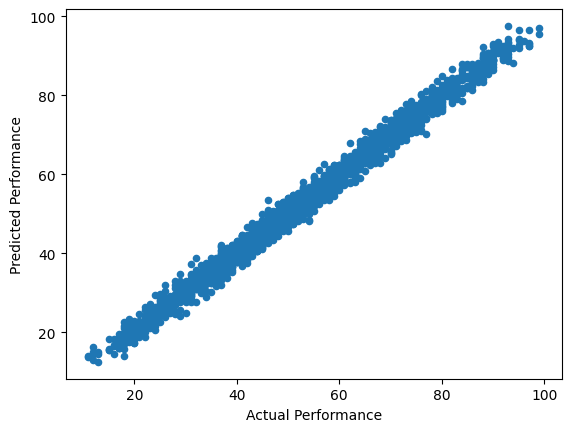

In [14]:
predict = np.round(model.predict(X_test), decimals=1)
pd.DataFrame({"Actual Performance": y_test, "Predicted Performance": predict}).plot(
    kind="scatter", x="Actual Performance", y="Predicted Performance"
)

In [15]:
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, predict)
r2 = r2_score(y_test, predict)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Absolute Error: 1.61
R^2 Score: 0.99


Linear Regression Equation for our dataset

In [18]:
feature_names = df.columns

coefficients = model.coef_
intercept = model.intercept_

equation = "y = " + " + ".join(
    f"{coef:.2f} * {name}" for coef, name in zip(coefficients, feature_names)
)
equation += f" + ({intercept:.2f})"

print("Linear Regression Equation:")
print(equation)

Linear Regression Equation:
y = 2.85 * Hours Studied + 1.02 * Previous Scores + 0.61 * Extracurricular Activities + 0.48 * Sleep Hours + 0.19 * Sample Question Papers Practiced + (-33.92)


Saving the model

In [20]:
import joblib

joblib.dump(model, "../Model/LinearRegression.sav")

['../Model/LinearRegression.sav']